# Milestone Report

## Predict the salary class of a person from the census data

### What is the problem being solved ?

Marketing of consumer goods requires information like age, location, spending power etc. Goods like cars might be purchased by people above a certain salary class. So, marketing of cars can be targeted only towards the class of people who can afford it. Filtering the population based on salary class is helpful to marketing campaigns for signing up to educational programs, selling of automobiles, to find clients for banking products like term deposits, credit cards etc. 

With the given set of attributes from the census data, which are Age, Work class, Final weight, Education, Education-num, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Hours-per-week, 
Native-country, we have to predict if the person’s salary class belong to >50k or <=50k per year.


### Target Audience

This analysis will be useful to marketing companies to segregate the people based on the class and target certain campaigns to certain people.

### Data to be used

The dataset being used consists of 15 attributes which are Age, Workclass, Finalweight, Education, Education-num, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Hours-per-week, Native-country, Class. It contains continuous and nominal attributes. It has 48842 instances of data with some missing values. 

Dataset is donated by 
Donor:
        Ronny Kohavi and Barry Becker
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk '@' live.com for questions. 

The dataset was extracted by Barry Becker in 1994 from census data of the United States. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


### Data Wrangling

In [3]:
# Data set being imported

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Missing values ? being imported as NAN while reading importing the data from the dat file.
df = pd.read_table("adult.dat", sep=",", header=None, na_values="?")

col_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 
             'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native Country', 
             'Class']
df.columns = col_names
print("Numbers of rows in dataframe - {}".format(len(df)))


Numbers of rows in df - 48842


In [16]:
# Inspect the first few rows of the dataframe 
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native Country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
# Removing the Final Weight column since I don't have any information about it
df = df.drop(["Fnlwgt"], axis = 1)


In [42]:
df.shape

(45222, 14)

In [19]:
# Check the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
Age               45222 non-null int64
Workclass         45222 non-null object
Education         45222 non-null object
Education-num     45222 non-null int64
Marital-status    45222 non-null object
Occupation        45222 non-null object
Relationship      45222 non-null object
Race              45222 non-null object
Sex               45222 non-null object
Capital-gain      45222 non-null int64
Capital-loss      45222 non-null int64
Hours-per-week    45222 non-null int64
Native Country    45222 non-null object
Class             45222 non-null object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [20]:
#Checking if there are NANs in dataframe
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native Country    0
Class             0
dtype: int64

<b>There are NAN values in the column Workclass, Occupation, Native Country. There are around 2800 rows NANs out of around 48000 rows, so I am dropping the null values from the dataframe. Trying to forward fill wouldn't make sense for these categorical values</b>

In [12]:
# Dropping NANs from df
df = df.dropna()


In [13]:
assert pd.notnull(df).all().all()

In [14]:
# No NANs after dropping them
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native Country    0
Class             0
dtype: int64

In [28]:
df.shape

(45222, 14)

<b>We will check if there are any outliers w.r.t to age feature below</b>

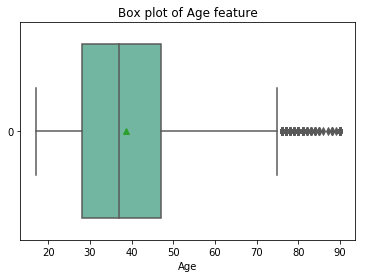

In [33]:
sns.boxplot(data=df.Age, orient="h", palette="Set2", showmeans=True)
plt.title("Box plot of Age feature")
plt.xlabel("Age")
plt.show()

<b>There seem to few outliers values for age between 75 to 90. This maybe due to the fact that many retire in theirs 70s. Even though it shows as outliers, these are valid data points and needed in the dataset. So, I will leave them in the data.
Also, we see that 50% of the people in the dataset are aged between 28 to 48yrs.</b>

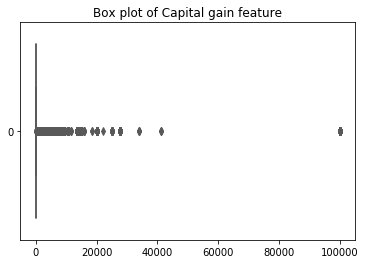

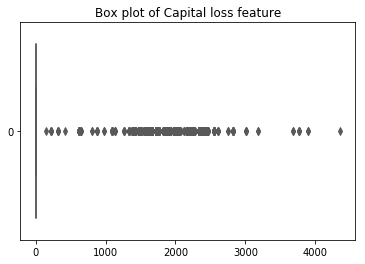

                Age  Education-num  Capital-gain  Capital-loss  Hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [90]:
# Spread of Capital Gain
sns.boxplot(data=df["Capital-gain"], orient="h", palette="Set2")
plt.title("Box plot of Capital gain feature")
plt.show()

# Spread  and Capital loss
sns.boxplot(data=df["Capital-loss"], orient="h", palette="Set2")
plt.title("Box plot of Capital loss feature")
plt.show()

print(df.describe())


In [92]:
print("Number of people with 0 Capital gain are {}".format(df["Capital-gain"].value_counts()[0]))
print("Number of people with 0 Capital loss are {}".format(df["Capital-loss"].value_counts()[0]))


Number of people with 0 Capital gain are 41432
Number of people with 0 Capital loss are 43082


Since more than 90% of the people have 0 Capital gain and 0 Capital loss, I will not consider those features in this prediction problem.


In [93]:
df = df.drop(["Capital-gain", "Capital-loss"], axis=1)
df.columns

Index(['Age', 'Workclass', 'Education', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours-per-week',
       'Native Country', 'Class'],
      dtype='object')

### Exploratory Data Analysis and Data Visualization

Oldest person's age in the dataset is 90
Youngest person's age in the dataset is 17


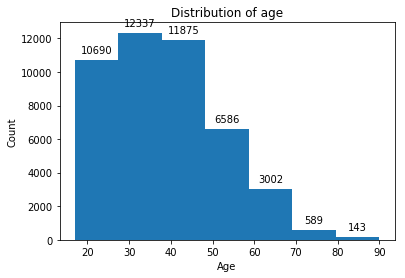

In [45]:
# Distribution of age feature

def annotate_showplot(patches):
    for rect in patches:
        y_value = int(rect.get_height())
        x_value = rect.get_x() + rect.get_width() / 2    
        plt.annotate(y_value, (x_value, y_value), xytext = (0, 5), textcoords="offset points", ha = 'center', va = 'bottom' )
    plt.show()

print("Oldest person's age in the dataset is {}".format(df["Age"].max()))
print("Youngest person's age in the dataset is {}".format(df["Age"].min()))
n, bins, patches = plt.hist(df['Age'], bins=7)
xticks = [20, 30, 40, 50, 60, 70, 80, 90]
plt.xticks(xticks)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age")
annotate_showplot(patches)
#for rect in patches:
#    y_value = int(rect.get_height())
#    x_value = rect.get_x() + rect.get_width() / 2    
#    plt.annotate(y_value, (x_value, y_value), xytext = (0, 5), textcoords="offset points", ha = 'center', va = 'bottom' )
#plt.show()


<b>From the plot above, we can see that maximum number of people in the dataset are between 30-40 yrs and least number of people in the group 80-90yrs.</b>

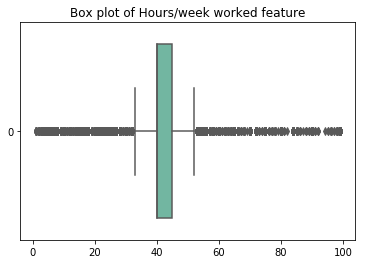

40.93801689443191


In [39]:
sns.boxplot(data=df["Hours-per-week"], orient="h", palette="Set2")
plt.title("Box plot of Hours/week worked feature")
plt.show()
print(df["Hours-per-week"].mean())

<b>Average number of hours worked in the dataset is 40.9 hrs.
There are a number of outliers which are number of hours worked less than 32hrs and more than 51hrs which do have predictive power in predicting the income class of the person.

Now, we will see how the person's age affects the number of hours worked per week.</b>

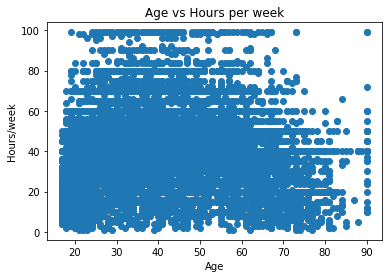

In [41]:
#Relation between Age and Hours/week features
plt.scatter(df["Age"], df["Hours-per-week"])
plt.title("Age vs Hours per week")
plt.xlabel("Age")
plt.ylabel("Hours/week")
plt.show()

<b>Maximum number of hours per week is worked by people in the age group between 20 and 70.
The standard number of hours/week which is 40hrs is put in by the people of all age group in the dataset. The plot also shows that most people are in age group between 20-65 and have worked between 20-50hrs per week. More precise numbers can be obtained by analysing the data further.</b>

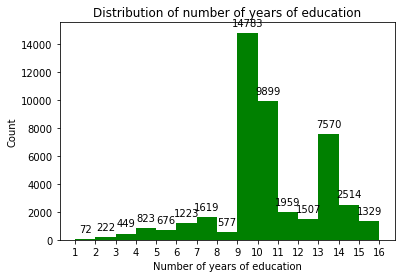

In [46]:
# Distribution of number of years of education
edu_num_series = df["Education-num"].value_counts()
xticks = edu_num_series.index.tolist()
xticks.sort()
plt.xticks(xticks)
n, bins, patches = plt.hist(df['Education-num'], bins=len(xticks) - 1, color='g')
#for rect in patches:
 #   y_value = int(rect.get_height())
  #  x_value = rect.get_x() + rect.get_width() / 2    
   # plt.annotate(y_value, (x_value, y_value), xytext = (0, 5), textcoords="offset points", ha = 'center', va = 'bottom' )
plt.xlabel("Number of years of education")
plt.ylabel("Count")
plt.title("Distribution of number of years of education")
annotate_showplot(patches)
#plt.show()


<b>Maximum number of people have 9 yrs of education. There are no people with zero years of education.</b>

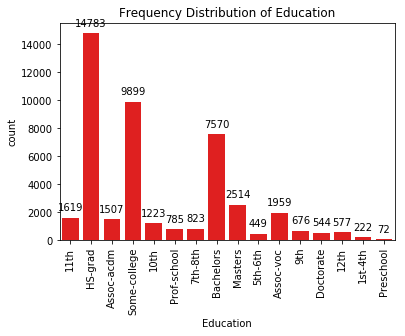

In [51]:
# Education
#print(df["Education"].value_counts())
ax = sns.countplot(x=df.Education, data=df, color="r");
rects = ax.patches
plt.title('Frequency Distribution of Education')
plt.xticks(rotation=90)
annotate_showplot(rects)
#i=1
#for rect in rects:
 #   #print(type(p))     
    #print(i)    
  #  y_value = int(rect.get_height())
   # x_value = rect.get_x() + rect.get_width() / 2    
    #print("The count in bin {} is {}".format(i, y_value))
    #print(x_value)
    #print(rect.get_width())
    #i = i+1
    #plt.annotate(y_value, (x_value, y_value), xytext = (0, 5), textcoords="offset points", ha = 'center', va = 'bottom' )
#plt.show()


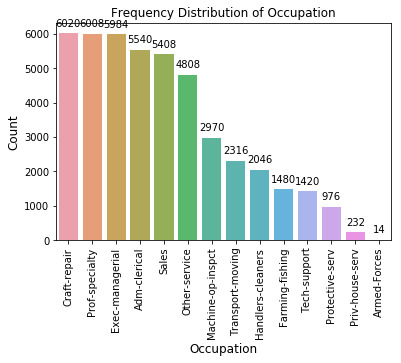

In [53]:
# Frequency of Occupation feature
occupation_count = df['Occupation'].value_counts()
plt.title('Frequency Distribution of Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation=90)
ax1 = sns.barplot(occupation_count.index, occupation_count.values, alpha=0.9)
rects = ax1.patches
annotate_showplot(rects)
#plt.show()


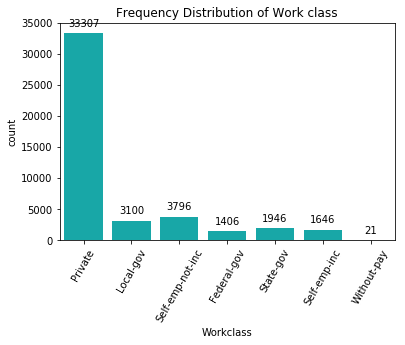

In [54]:
# Distribution of Workclass
ax = sns.countplot(x=df.Workclass, data=df, color="c");
rects = ax.patches
plt.title('Frequency Distribution of Work class')
plt.xticks(rotation=60)
annotate_showplot(rects)


<b>Majority of the given population works for Private sector.</b>

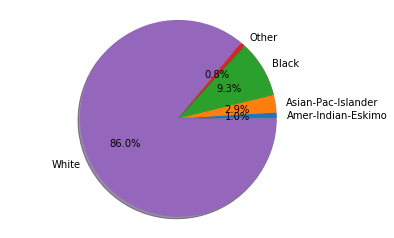

In [56]:
#Percentage of each race in the dataset
race_labels = df['Race'].astype('category').cat.categories.tolist()
race_counts = df['Race'].value_counts()
sizes = [race_counts[var_cat] for var_cat in race_labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=race_labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()


 1. Who are the majority in the >50k income class?

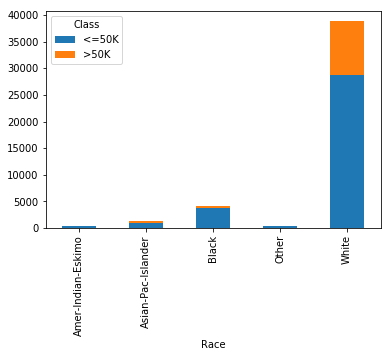

In [63]:
# Race vs Class
df_race = pd.crosstab(index=df["Race"], columns=df["Class"])
df_race.plot(kind='bar', stacked=True)

 The white race seem to have dominated the income class of more than 50k. But then the given population itself is dominated by white.

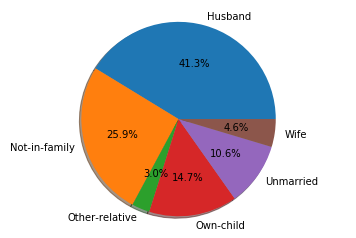

In [65]:
#Percentage of each relation in the dataset
relationship_labels = df['Relationship'].astype('category').cat.categories.tolist()
relationship_counts = df['Relationship'].value_counts()
sizes = [relationship_counts[var_cat] for var_cat in relationship_labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=relationship_labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

<b>Given data set seems to be having lot more men than women. </b>

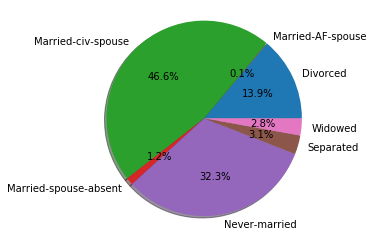

In [67]:
#Percentage of each marital status  in the dataset
marital_status_labels = df['Marital-status'].astype('category').cat.categories.tolist()
marital_status_counts = df['Marital-status'].value_counts()
sizes = [marital_status_counts[var_cat] for var_cat in marital_status_labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=marital_status_labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()


<b>There are so many categories in Marital status feature. For simplicity sake I will group it into 2 groups. Status as divorced, separated, widowed and never married as "Not married" and status as married-civ-spouse, married-spouse-absent, married-AF-spouse as "Married"
</b>


## Does the income class of >50k have more married people or not married people?

In [69]:
# Marital status vs Class
df_Marital_status_merged = df.copy()
#print(df_Marital_status_merged["Marital-status"].value_counts())
str_list = ["Divorced", "Separated", "Widowed", "Never-married"]
for str in str_list:
    df_Marital_status_merged["Marital-status"] = np.where(df_Marital_status_merged['Marital-status'] == str , 'Not-married', df_Marital_status_merged['Marital-status'])
str_list = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
for str in str_list:
    df_Marital_status_merged["Marital-status"] = np.where(df_Marital_status_merged['Marital-status'] == str , 'Married', df_Marital_status_merged['Marital-status'])
print(df_Marital_status_merged["Marital-status"].value_counts())


Not-married    23583
Married        21639
Name: Marital-status, dtype: int64


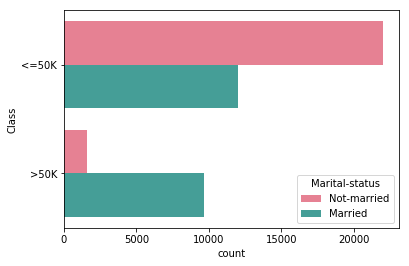

In [70]:
sns.countplot(y=df_Marital_status_merged["Class"], hue=df_Marital_status_merged["Marital-status"], data=df_Marital_status_merged, palette='husl')
plt.show()


### Majority of the income class of >50k has married people. But the income class of <=50k has more Not-married people than married people.
### Maybe the responsibility of being married and having to maintain the household will push the person to earn more.

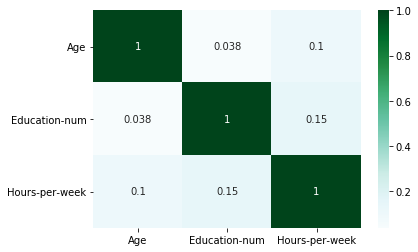

In [94]:
#Correlation between Age, Final Weight, Number of education years, Hours/week worked
sns.heatmap(df.corr(), cmap='BuGn', annot=True)
plt.show()


None of the features are strongly positively correlated or negatively correlated. Weak correlation between the numerical features.

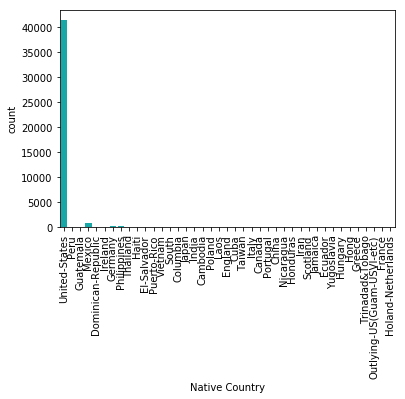

Distribution of people across countries

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                   

In [76]:
# Distribution of Native country
ax1 = sns.countplot(x=df["Native Country"], data=df, color="c");
plt.xticks(rotation=90)
plt.show()
print("Distribution of people across countries\n")
print(df["Native Country"].value_counts())


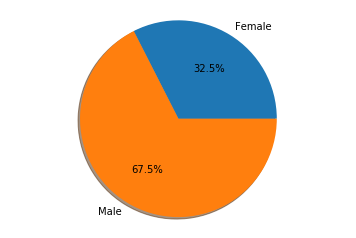

In [83]:
labels = df['Sex'].astype('category').cat.categories.tolist()
counts = df['Sex'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()


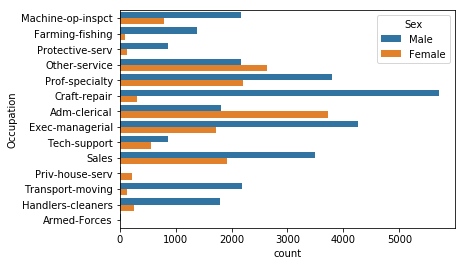

In [79]:
# Distribution of men v/s women in various occupation
sns.countplot(y=df["Occupation"], hue=df["Sex"], data=df)
plt.show()

<b>There are significantly more men than women in transport-moving occupation, which can be explained by the need of physical strength for that occupation.
Admin-clerical occupation has more women than men.</b>

## Does the income group of >50k have more men or women ?

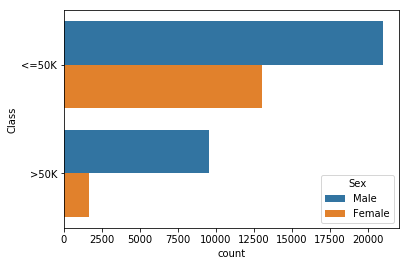

In [80]:
# Men v/s women in class(<=50, >50)
sns.countplot(y=df["Class"], hue=df["Sex"], data=df)
plt.show()


### Men comprise of 2/3rd and women of 1/3rd the given population.
### 1/3rd of the population is women, but only 1/8 of the income class of >50k is women. Most of the people in the income class of >50k are men.